# Natural Language Processing - Lyrics Predictions

## Libraries and Settings

In [2]:
# Libraries
import os
import re
import numpy as np
import pandas as pd
import random
import string

import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk

# Import only once
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Set seed
seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Current working directory
print('Current working directory:', os.getcwd())

[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/vscode/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/vscode/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/vscode/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/vscode/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Current working directory: /workspaces/data_analytics/Week_11


## Import data

In [7]:
# Import original data
data_orig = pd.read_csv('charlixcx.tsv', sep="\t")[['sentiment', 'lyrics']]
data_orig = data_orig.rename(columns={"sentiment": "Rating", "lyrics": "Lyrics"})
# Subset of the data
sub_3 = data_orig.loc[data_orig['Rating'].isin([3])].sample(n=1000, random_state=42, replace=True)
sub_4 = data_orig.loc[data_orig['Rating'].isin([4])].sample(n=1000, random_state=42, replace=True)
sub_5 = data_orig.loc[data_orig['Rating'].isin([5])].sample(n=1000, random_state=42, replace=True)
# Concatenating the subsets to one data frame
data = pd.concat([sub_3, sub_4, sub_5]).reset_index(drop=True)
data



,Rating,Lyrics
0,3.0,I never thought I would find it But I found wh...
1,3.0,I never thought I would find it But I found wh...
2,3.0,I never thought I would find it But I found wh...
3,3.0,I never thought I would find it But I found wh...
4,3.0,I never thought I would find it But I found wh...
...,...,...
2995,5.0,"(Vroom, vroom) Bitches know they can't catch m..."
2996,5.0,"(Vroom, vroom) Bitches know they can't catch m..."
2997,5.0,"(Vroom, vroom) Bitches know they can't catch m..."
2998,5.0,"(Vroom, vroom) Bitches know they can't catch m..."


## Check missing values

In [8]:
data.isna().sum()

data

,Rating,Lyrics
0,3.0,I never thought I would find it But I found wh...
1,3.0,I never thought I would find it But I found wh...
2,3.0,I never thought I would find it But I found wh...
3,3.0,I never thought I would find it But I found wh...
4,3.0,I never thought I would find it But I found wh...
...,...,...
2995,5.0,"(Vroom, vroom) Bitches know they can't catch m..."
2996,5.0,"(Vroom, vroom) Bitches know they can't catch m..."
2997,5.0,"(Vroom, vroom) Bitches know they can't catch m..."
2998,5.0,"(Vroom, vroom) Bitches know they can't catch m..."


## Wordcloud with most frequently used words

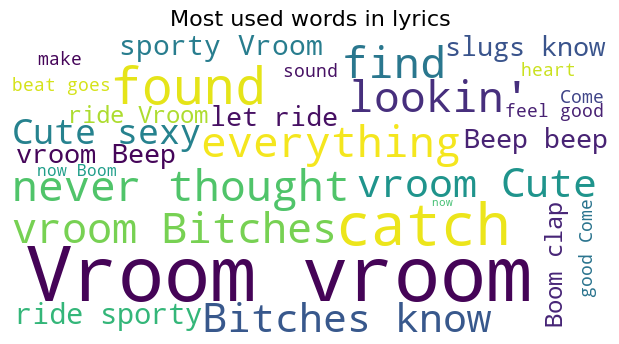

In [9]:
# Wordcloud function
def wordCloud_generator(data, title=None):
    
    wordcloud = WordCloud(height=300,
                          width=600,
                          background_color ='white',
                          min_font_size = 8
                         ).generate(" ".join(data.values))
    
    # Plot the WordCloud image                        
    plt.figure(figsize = (6, 4), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=16)
    plt.show()
    
# Create Wordcloud
wordCloud_generator(data['Lyrics'], title="Most used words in lyrics")